### Synthetic data data proudced by Victoria Winters is analysed in this Notebook using the divertor_spectroscopy functionalities

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from divertor_spectroscopy import utilities as utils
import xemc3

ModuleNotFoundError: No module named 'xemc3'

### Reading the data:

In [11]:
path = "Neon/LoS_distribution_Ne_0.npz"
element = "n"
element = "ne"
if element == "ne":
    path = "Neon/LoS_distribution_Ne_0.npz"
if element == "n":
    path = "synthetic_spectra_N.npy"
data = np.load(path)
if False:
    w_start = 397
    w_stop = 406
    w_idx_start = utils.val2idx(data[:,0]/10,w_start)
    w_idx_stop = utils.val2idx(data[:,0]/10,w_stop)
    wavelength = data[w_idx_start:w_idx_stop,0]/10
    intensity = data[w_idx_start:w_idx_stop,1:].T
else:
    keys = data.keys()
    for key in keys:
        print(key)
        #print(data[key])
    #wavelength = data[:,0]#/10
    #intensity = data[:,1:].T

Te
ni
Ti
niN1
niN2
gt
L16
L24
L25


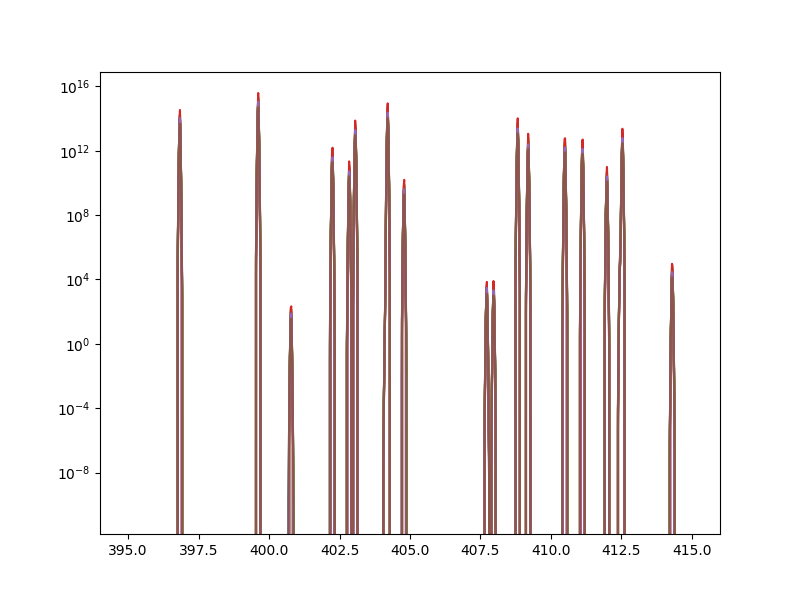

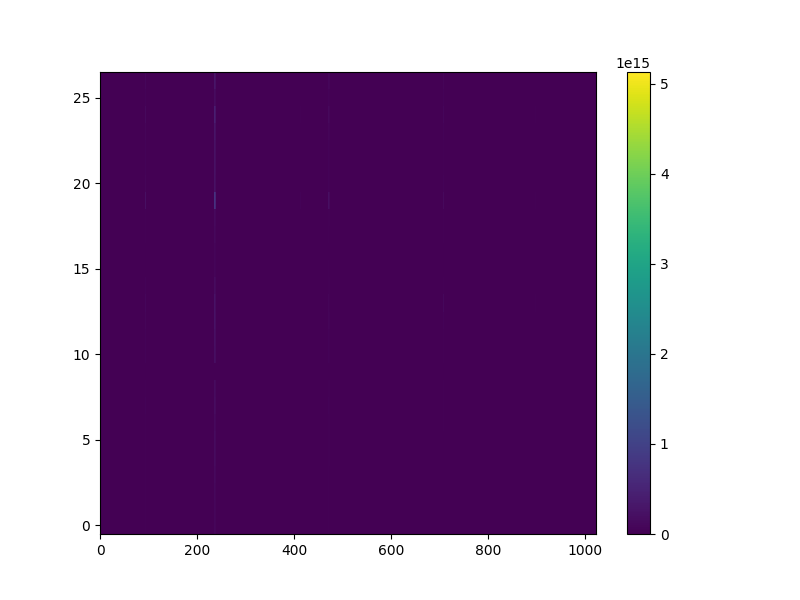

In [ ]:
plt.figure(figsize=(8,6))
for channel in range(16):
    plt.plot(wavelength,intensity[channel])
plt.yscale("log")
plt.show()

plt.figure(figsize=(8,6))
plt.imshow(intensity,aspect="auto",interpolation="none",origin="lower")
plt.colorbar()
plt.show()

### Creating the model to fit this spectrum
- no fine structure resolution - usually lines have multiple parts
- no impurity lines - no problems with overlapping lines
- vacuum wavelength are used

10.0 % done
20.0 % done
30.0 % done
40.0 % done
50.0 % done
60.0 % done
70.0 % done
80.0 % done
90.0 % done


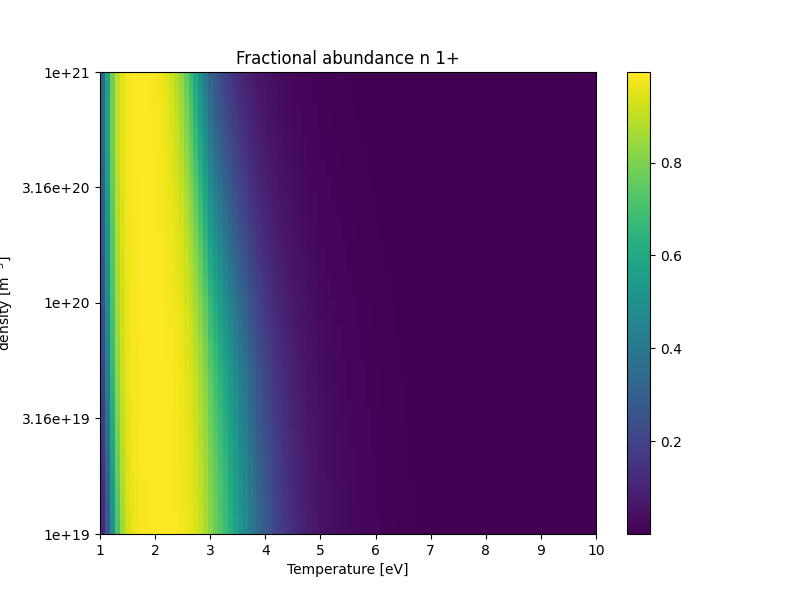

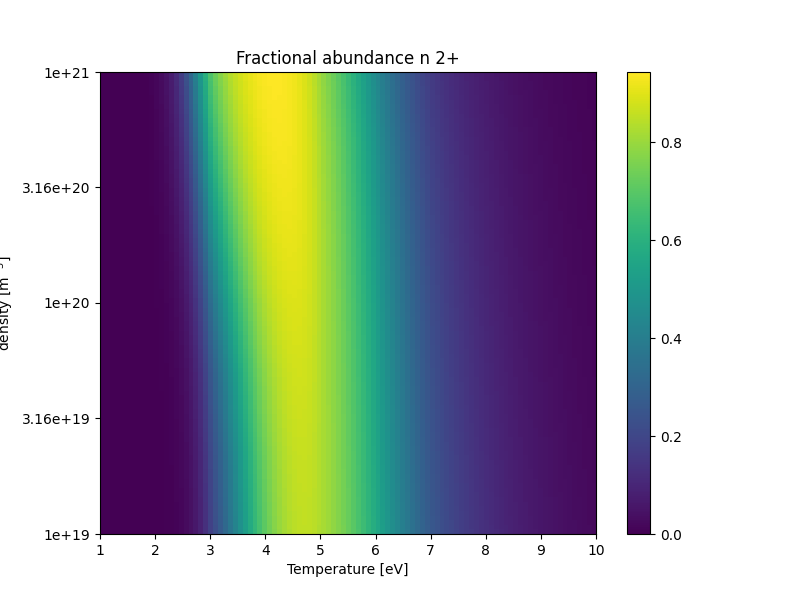

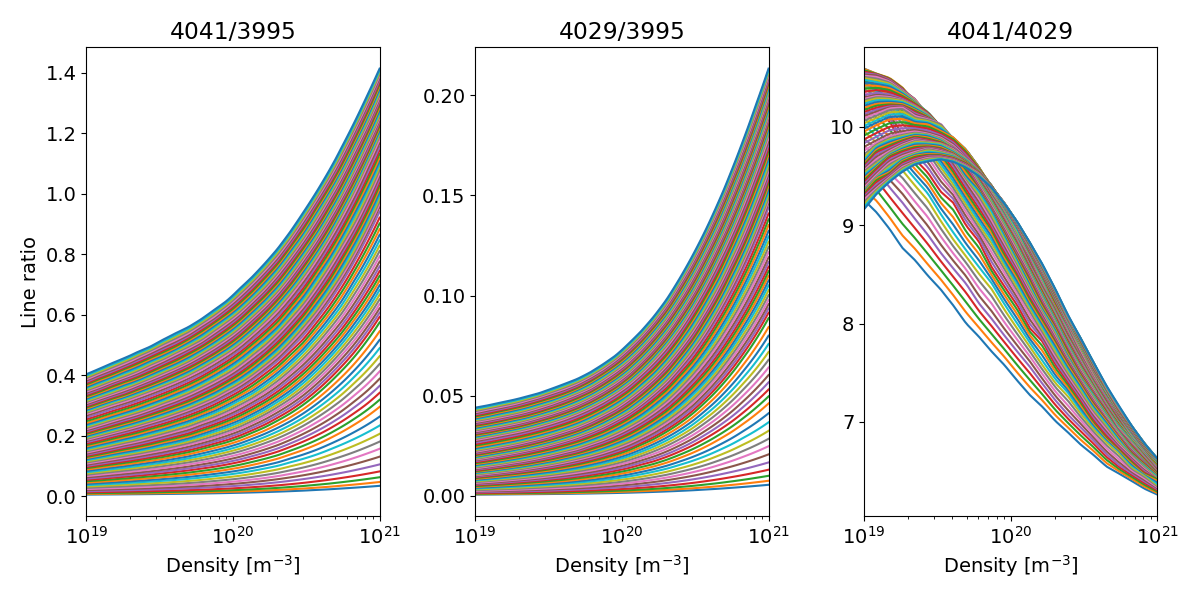

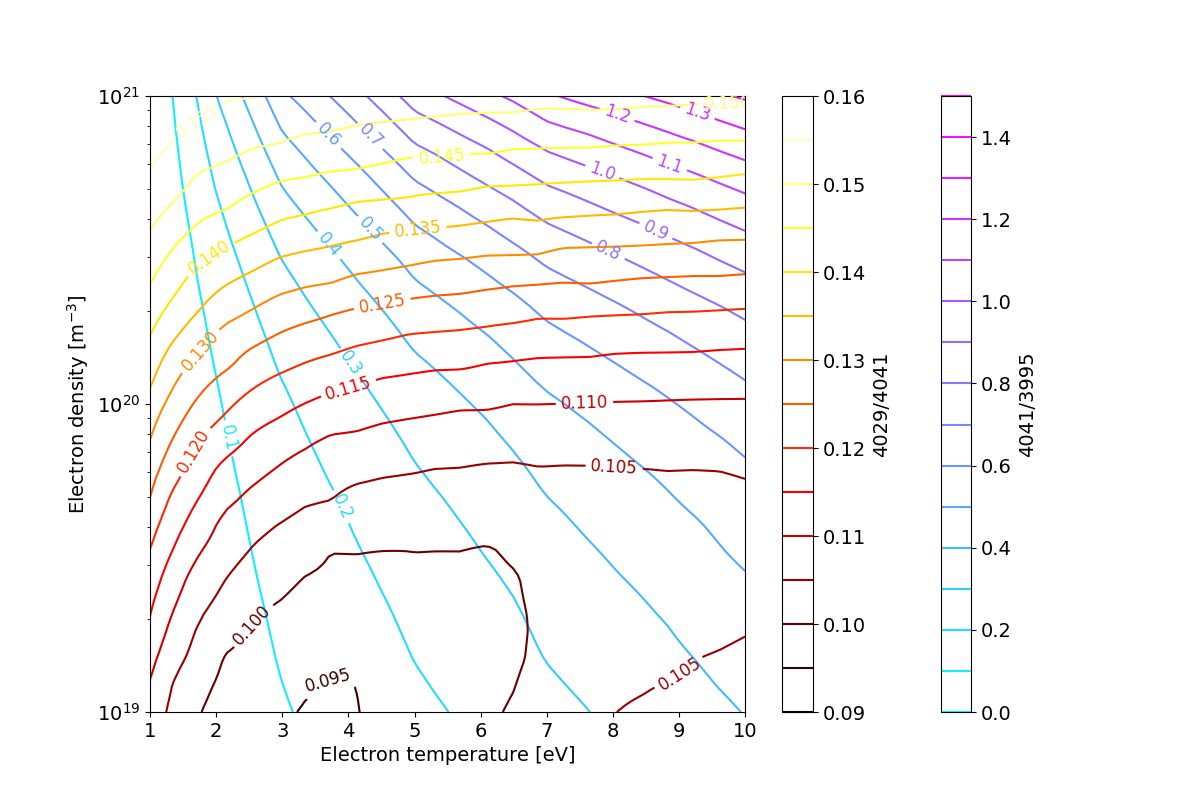

In [ ]:
from divertor_spectroscopy import spectrum
from divertor_spectroscopy import spectral_line_classes
class PEC_test_spectrum(spectrum.Spectrum):
    
    def __init__(self,element="n"):
        # PEC lines
        debug=True
        cache=False
        save = False
        self.multiplets = []
        self.pec_lines = []
        self.balmer_lines = []
        self.all_tags = []
        self.width = 0.0078
        if element == "n":
            
            multiplets = [spectral_line_classes.Multiplet(positions=[399.613],branching_ratios=[1], intensity=1e17, width=self.width, tag="NII"),
                spectral_line_classes.Multiplet(positions=[403.060], branching_ratios=[1], intensity=1e17, width=self.width, tag="NII"),
                spectral_line_classes.Multiplet(positions=[404.207], branching_ratios=[1], intensity=1e17, width=self.width, tag="NII")]
        if element == "ne":
            multiplets = [spectral_line_classes.Multiplet(positions=[357.207],branching_ratios=[1], intensity=1e17, width=self.width, tag="NeII"),
                spectral_line_classes.Multiplet(positions=[371.410], branching_ratios=[1], intensity=1e17, width=self.width, tag="NeII"),
                spectral_line_classes.Multiplet(positions=[371.821], branching_ratios=[1], intensity=1e17, width=self.width, tag="NeII")]
        ne_count = 100
        Te_count = 101
        if element == "n":
            ne_range = [1e19,1e21]
        if element == "ne":
            ne_range = [5e19,1e21]
        Te_range = [1,10]
        electron_density = 1e20
        electron_temperature = 3
        impurity_density = 1e17
        self.add_pec_lines_to_model(multiplets=multiplets,element=element,ion=1,ne_range=ne_range,Te_range=Te_range,ne_count=ne_count,Te_count=Te_count,electron_density=electron_density,electron_temperature=electron_temperature,impurity_density=impurity_density,emission_length=0.1,save=save,cache=cache,debug=debug)
model = PEC_test_spectrum(element=element)
        

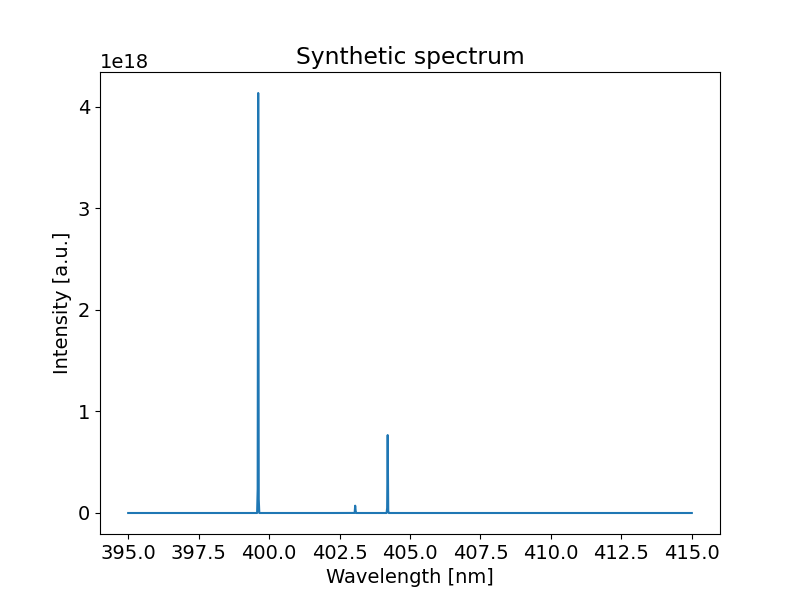

In [ ]:
model.plot_synthetic_spectrum(wavelength)

### Use model to fit spectrum

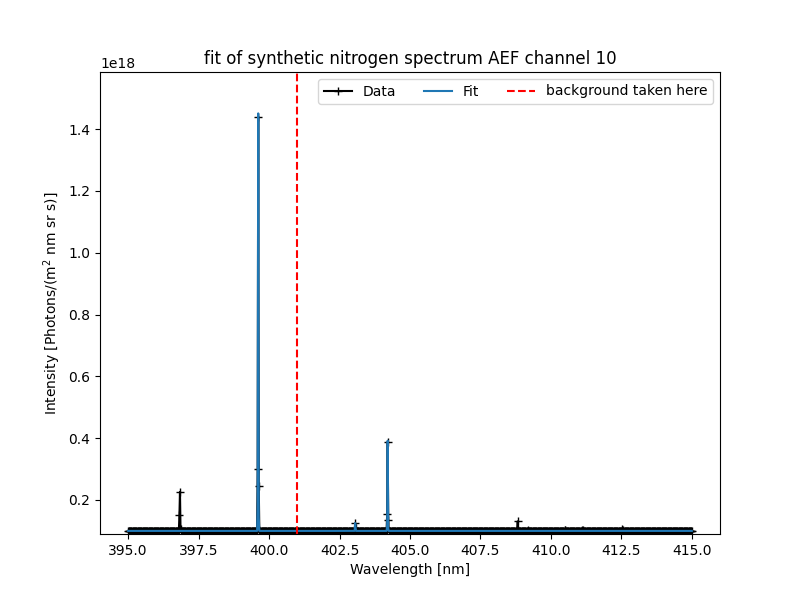

In [ ]:
%matplotlib widget
ne = []
Te = []
nI = []
cI = []
for channel in range(27):
    experiment_data = 1e3*intensity[channel]+1e17
    if element == "ne":
        background_position = 371
    if element == "n":
        background_position = 401
    debug = True
    xlim = None
    scale = "linear"
    title = "fit of synthetic nitrogen spectrum AEF channel "+str(channel)
    wavelength_fit = wavelength# + 0.005
    if channel != 10:
        debug = False
    popt = model.fit_spectrum(experiment_data=experiment_data,wavelength=wavelength_fit,background_position=background_position,xlim=xlim,scale=scale,title=title,debug=debug)
    if channel == 9:
        ne.append(np.nan)
        Te.append(np.nan)
        nI.append(np.nan)
        cI.append(np.nan)
    else:
        ne.append(popt[0])
        Te.append(popt[1])
        nI.append(popt[2])
        cI.append(10**popt[2]/10**popt[0])
        

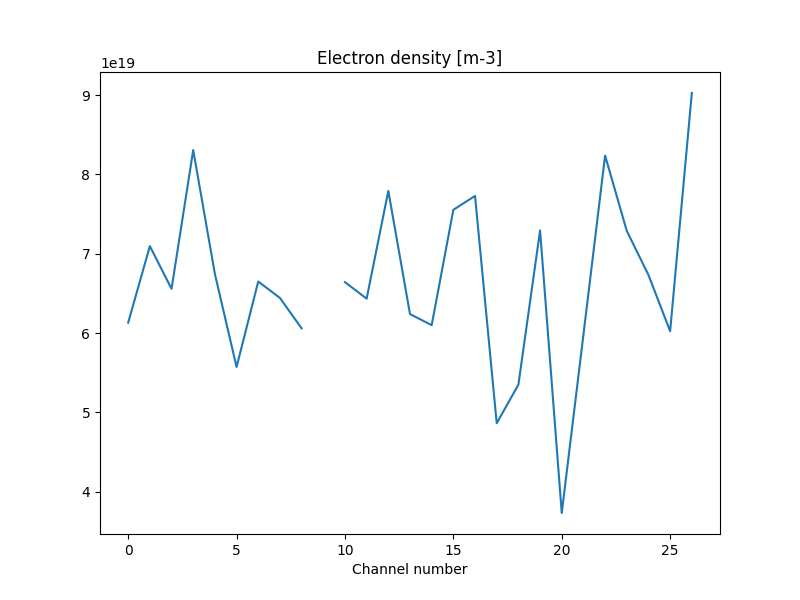

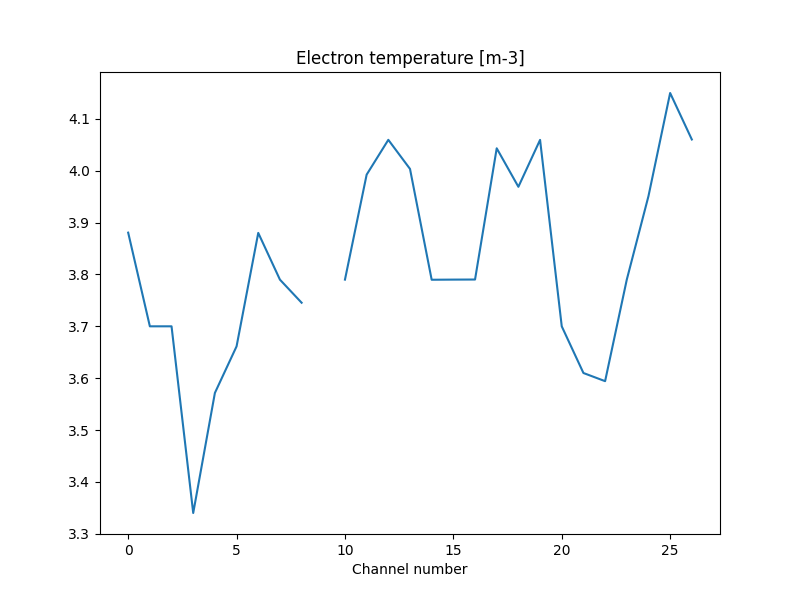

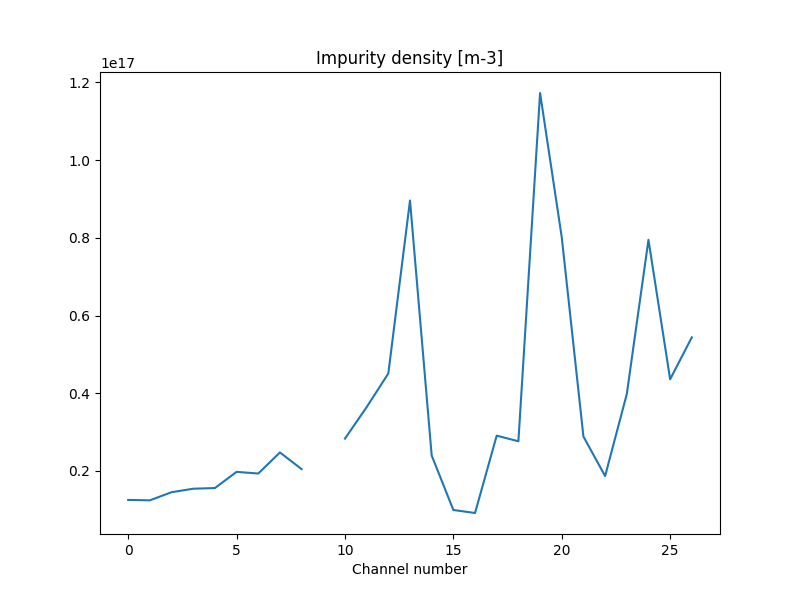

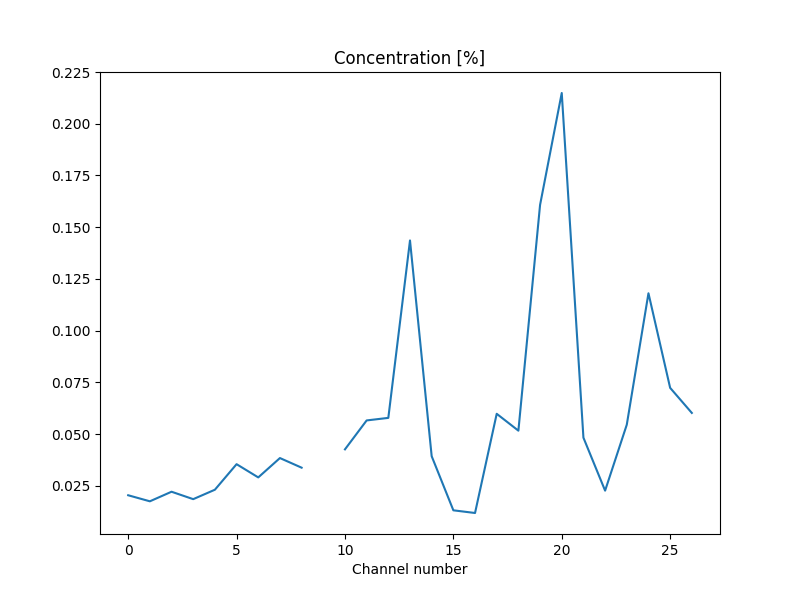

In [ ]:
plt.figure(figsize=(8,6))
plt.title("Electron density [m-3]")
plt.plot(10**np.array(ne))
plt.xlabel("Channel number")
plt.show()

plt.figure(figsize=(8,6))
plt.title("Electron temperature [m-3]")
plt.plot(np.array(Te))
plt.xlabel("Channel number")
plt.show()

plt.figure(figsize=(8,6))
plt.title("Impurity density [m-3]")
plt.plot(10**np.array(nI))
plt.xlabel("Channel number")
plt.show()

plt.figure(figsize=(8,6))
plt.title("Concentration [%]")
plt.plot(np.array(cI)*100)
plt.xlabel("Channel number")
plt.show()